# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [1]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [2]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [3]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8


## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [1]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd

df=pd.read_csv('labels_final.csv',dtype=str)


In [2]:
df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


# Initial visulaizatiosn distribtuion or number or points in each class

In [3]:
idx_label_map={ 0 :"letter",
    1 :"form",
    2 :"email",
    3 :"handwritten",
    4 :"advertisement",
    5 :"scientific_report",
    6 :"scientific_publication",
    7 :"specification",
    8 :"file_folder",
    9 :"news_article",
    10 :"budget",
    11 :"invoice",
    12 :"presentation",
    13 :"questionnaire",
    14 :"resume",
    15: "memo"}

import os
tf_base = '/scratch/bbs/tf_folder_struct/'
for key,val in idx_label_map.items():
    os.mkdir(os.path.join(tf_base,val))

# Sanity check
To check in paths are correct or not 

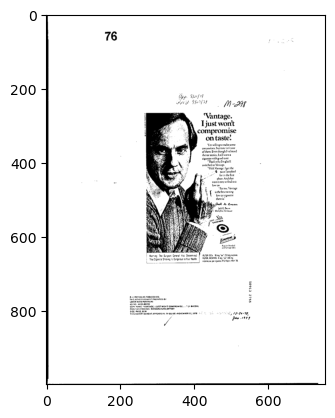

In [7]:
import pathlib
base_path = '/scratch/bbs/data/data_final/'
data_root = pathlib.Path(base_path)
# Merge this before the paths of in the dataframe
image_path = data_root/pathlib.Path(df.iloc[0]['path'])
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open(image_path)
# show the image
plt.imshow(im,cmap='gray')

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

from tqdm import tqdm
img_paths = []
img_labels = []
for i in tqdm(range(len(df))):
    path,label = df.iloc[i]['path'],df.iloc[i]['label']
    img_paths.append(path)
    img_labels.append(label)

import shutil
for path,label in tqdm(zip(img_paths,img_labels)):
    shutil.copy(os.path.join(base_path,path),os.path.join(tf_base,idx_label_map[int(label)],path.split('/')[-1]))# Old path , new path

len(img_paths),len(img_labels)

We have 48,000 images 

# Values are made between 0 and 1 by rescale by 1/255

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., validation_split=0.2)

train_generator = data_generator.flow_from_dataframe(dataframe=df, directory=base_path,x_col='path',y_col='label',target_size=(256,256),
                                   class_mode='categorical',batch_size=32,subset='training',seed=37)


validation_generator = data_generator.flow_from_dataframe(dataframe=df, directory=base_path,x_col='path',y_col='label',
                                                          target_size=(256,256),class_mode='categorical',batch_size=32,
                                                          subset='validation',seed=37)

# Converting the images to jpeg

import cv2
for path,label in tqdm(zip(img_paths,img_labels)):
    old_path = os.path.join(base_path,path)
    read = cv2.imread(old_path)
    img_name = path.split('/')[-1]
    new_img_name = img_name.split('.')[0] + '.jpg'
    new_path = os.path.join(tf_base,idx_label_map[int(label)],new_img_name)
    cv2.imwrite(new_path,read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])

In [1]:
import tensorflow as tf
tf_base = '/scratch/bbs/tf_folder_struct/'
train_generator = tf.keras.utils.image_dataset_from_directory(directory=tf_base,label_mode ='categorical',seed=37
                                            ,validation_split=0.15,subset='training',batch_size=32) # # Image size is by defalut 256,256 deafult batch size is 32

Found 47756 files belonging to 16 classes.
Using 40593 files for training.


2022-10-21 17:17:03.549298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 17:17:04.119787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9651 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:03:00.0, compute capability: 7.5


In [2]:
validation_generator = tf.keras.utils.image_dataset_from_directory(directory=tf_base,label_mode ='categorical',seed=37
                                            ,validation_split=0.15,subset='validation',batch_size=32)# Image size is by defalut 256,256 deafult batch size is 32

Found 47756 files belonging to 16 classes.
Using 7163 files for validation.




3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

https://www.tensorflow.org/tutorials/images/transfer_learning

In [7]:
vgg16_base = tf.keras.applications.VGG16(include_top=False,input_shape=(256,256,3))

In [8]:
vgg16_base.trainable = False

input_layer = tf.keras.Input([256, 256, 3], dtype = tf.uint8)
x = tf.cast(input_layer, tf.float32)

prepped = tf.keras.applications.vgg16.preprocess_input(x)

layer_1 = vgg16_base(prepped)# layer 1 is output from vgg 16
# Add One cov layer 
# Add one max pool layer
# 2 Dense fullay connected layert
# output layer

Conv1 = tf.keras.layers.Conv2D(filters=512,kernel_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='custom_conv_2d')(layer_1)
#MaxPool Layer
Pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid',data_format='channels_last',name='custom_max_pool')(Conv1)

#Flatten
flatten = tf.keras.layers.Flatten(data_format='channels_last',name='custom_Flatten')(Pool1)

#FC layer
FC1 = tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='custom_FC1')(flatten)

#FC layer
FC2 = tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='custom_FC2')(FC1)

#output layer
Out = tf.keras.layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

model_1 = tf.keras.models.Model(inputs=input_layer,outputs=Out)

In [9]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 custom_conv_2d (Conv2D)     (None, 7, 7, 512)         1049088   
                                                             

In [10]:
import datetime
initial_epochs_m1 = 10
log_dir_m1 = os.path.join("logs",'fits','model1_logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_m1,histogram_freq=0,write_graph=True)
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model_1.fit(train_generator,epochs=initial_epochs_m1,validation_data=validation_generator,callbacks=[tensorboard_callback])

Epoch 1/10


/home2/sisodiya.bhoomendra/venvs/global/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-10-20 22:42:47.509109: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-10-20 22:42:47.991103: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


318/318 [==============================] - 190s 576ms/step - loss: 3.1567 - categorical_accuracy: 0.5364 - val_loss: 1.1064 - val_categorical_accuracy: 0.6772
Epoch 2/10
318/318 [==============================] - 179s 560ms/step - loss: 0.8704 - categorical_accuracy: 0.7379 - val_loss: 1.0173 - val_categorical_accuracy: 0.7084
Epoch 3/10
318/318 [==============================] - 179s 560ms/step - loss: 0.5818 - categorical_accuracy: 0.8229 - val_loss: 1.0734 - val_categorical_accuracy: 0.7167
Epoch 4/10
318/318 [==============================] - 179s 561ms/step - loss: 0.3880 - categorical_accuracy: 0.8810 - val_loss: 1.2226 - val_categorical_accuracy: 0.7162
Epoch 5/10
318/318 [==============================] - 179s 561ms/step - loss: 0.2944 - categorical_accuracy: 0.9092 - val_loss: 1.3152 - val_categorical_accuracy: 0.7077
Epoch 6/10
318/318 [==============================] - 179s 561ms/step - loss: 0.2364 - categorical_accuracy: 0.9240 - val_loss: 1.5324 - val_categorical_accuracy

### Added decay in learning rate tryout different optimizers 

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [11]:
full_Conv1 = tf.keras.layers.Conv2D(filters=256,kernel_size=(8,8),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='custom_conv_fully_connected_2d_1')(layer_1)

full_Conv2 = tf.keras.layers.Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=67),name='custom_conv_fully_connected_2d_2')(full_Conv1)

flatten = tf.keras.layers.Flatten(data_format='channels_last',name='M2_Flatten')(full_Conv2)

output_m2 = tf.keras.layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten)

model_2 = tf.keras.models.Model(inputs=input_layer,outputs=output_m2)

In [12]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 custom_conv_fully_connected  (None, 1, 1, 256)        8388864   
 _2d_1 (Conv2D)                                            

In [13]:
initial_epochs_m2 = 12
log_dir_m2 = os.path.join("logs",'fits', "model2_logs")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_m2,histogram_freq=0,write_graph=True)
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model_2.fit(train_generator,epochs=initial_epochs_m2,validation_data=validation_generator,callbacks=[tensorboard_callback])

Epoch 1/12
318/318 [==============================] - 182s 567ms/step - loss: 2.5630 - categorical_accuracy: 0.6042 - val_loss: 1.2929 - val_categorical_accuracy: 0.6817
Epoch 2/12
318/318 [==============================] - 181s 566ms/step - loss: 0.7660 - categorical_accuracy: 0.7785 - val_loss: 1.1979 - val_categorical_accuracy: 0.7046
Epoch 3/12
318/318 [==============================] - 180s 565ms/step - loss: 0.4716 - categorical_accuracy: 0.8527 - val_loss: 1.2101 - val_categorical_accuracy: 0.7208
Epoch 4/12
318/318 [==============================] - 181s 566ms/step - loss: 0.3480 - categorical_accuracy: 0.8910 - val_loss: 1.3695 - val_categorical_accuracy: 0.7116
Epoch 5/12
318/318 [==============================] - 181s 566ms/step - loss: 0.2740 - categorical_accuracy: 0.9122 - val_loss: 1.3681 - val_categorical_accuracy: 0.7204
Epoch 6/12
318/318 [==============================] - 181s 567ms/step - loss: 0.2124 - categorical_accuracy: 0.9320 - val_loss: 1.7193 - val_categoric

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [3]:
tf.keras.backend.clear_session()
vgg16_base_m3 = tf.keras.applications.VGG16(include_top=False,input_shape=(256,256,3))

vgg16_base_m3.trainable = True
depth = 11
for layer in vgg16_base_m3.layers[:depth]:
    layer.trainable = False

In [4]:
vgg16_base_m3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [5]:
input_layer_m3 = tf.keras.Input([256, 256, 3], dtype = tf.uint8)
x_m3 = tf.cast(input_layer_m3, tf.float32)

prepped_m3 = tf.keras.applications.vgg16.preprocess_input(x_m3)

layer_1_m3 = vgg16_base_m3(prepped_m3)# layer 1 is output from vgg 16

full_Conv1_m3 = tf.keras.layers.Conv2D(filters=4096,kernel_size=(8,8),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='custom_conv_fully_connected_2d_1')(layer_1_m3)

full_Conv2_m3 = tf.keras.layers.Conv2D(filters=4096,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=67),name='custom_conv_fully_connected_2d_2')(full_Conv1_m3)

flatten_m3 = tf.keras.layers.Flatten(data_format='channels_last',name='M2_Flatten')(full_Conv2_m3)

output_m3 = tf.keras.layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten_m3)

model_3 = tf.keras.models.Model(inputs=input_layer_m3,outputs=output_m3)
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 custom_conv_fully_connected  (None, 1, 1, 4096)       134221824 
 _2d_1 (Conv2D)                                              

Adam is not working every time going in the the loss stuck at  0.06
SGD with and without momentum was giving nan loss 

In [7]:
import os
initial_epochs_m3 = 5
log_dir_m3 = os.path.join("logs",'fits', "model3_logs_fit_adam_m3_4096_final")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_m3,histogram_freq=0,write_graph=True)
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model_3.fit(train_generator,epochs=initial_epochs_m3,validation_data=validation_generator,callbacks=[tensorboard_callback])

Epoch 1/5


2022-10-21 17:19:40.036304: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-10-21 17:19:40.691552: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1269/1269 [==============================] - 397s 309ms/step - loss: 2.1339 - categorical_accuracy: 0.3189 - val_loss: 1.2107 - val_categorical_accuracy: 0.6270
Epoch 2/5
1269/1269 [==============================] - 391s 308ms/step - loss: 0.9214 - categorical_accuracy: 0.7185 - val_loss: 0.8043 - val_categorical_accuracy: 0.7535
Epoch 3/5
1269/1269 [==============================] - 392s 309ms/step - loss: 0.6356 - categorical_accuracy: 0.8061 - val_loss: 0.7910 - val_categorical_accuracy: 0.7678
Epoch 4/5
1269/1269 [==============================] - 392s 309ms/step - loss: 0.4420 - categorical_accuracy: 0.8597 - val_loss: 0.8318 - val_categorical_accuracy: 0.7731
Epoch 5/5
1269/1269 [==============================] - 392s 309ms/step - loss: 0.2876 - categorical_accuracy: 0.9085 - val_loss: 1.1348 - val_categorical_accuracy: 0.7604


In [9]:
!tensorboard dev upload --logdir '/home2/sisodiya.bhoomendra/Applied_ai/21_Transfer_Learning/logs/fits/model3_logs_fit_adam_m3_4096_final/' --name Model_3

Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/TRrBJeEdQiePrFMV22M3ug/

[2022-10-21T18:03:15] Started scanning logdir.
[2022-10-21T18:03:17] Total uploaded: 30 scalars, 0 tensors, 1 binary objects (98.0 kB)
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/TRrBJeEdQiePrFMV22M3ug/


In [10]:
!tensorboard dev upload --logdir '/home2/sisodiya.bhoomendra/Applied_ai/21_Transfer_Learning/logs/fits/model2_logs/' --name Model_2

Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/vwe8p8foQY6xl8kR0Qz46Q/

[2022-10-21T18:05:04] Started scanning logdir.
E1021 18:05:07.164626 22455692863296 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-10-21T18:05:07] Total uploaded: 84 scalars, 0 tensors, 1 binary objects (83.3 kB)
Total skipped: 1 binary objects (83.3 kB)
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/vwe8p8foQY6xl8kR0Qz46Q/


In [11]:
!tensorboard dev upload --logdir '/home2/sisodiya.bhoomendra/Applied_ai/21_Transfer_Learning/logs/fits/model1_logs/' --name Model_1

Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/OKCb0ZpQT7azxY8ahLb0qQ/

[2022-10-21T18:06:01] Started scanning logdir.
[2022-10-21T18:06:02] Total uploaded: 60 scalars, 0 tensors, 1 binary objects (84.4 kB)
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/OKCb0ZpQT7azxY8ahLb0qQ/


### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3

### Model 1
Initially I tried with convnet of size 256*3*3 with stride of 2,2 and max pool layer of 3,3 and stride of size 2,2 and dense layer with 128 ,64 , 16( Output) but It was not converging well so based on the suggestion of the  the applied ai team i increased the number of neuron in dense layer and also the stride in the Max poll is very high which might be leading to a lot of information loss and hence poor convergence also the issue is with the learning rate as well the learning rate of 0.01 is high after experimentation learning rate of 0.001 worked the best 


### Model 2
The learning from the previous steps helped and following the advice I was able to design a good model on my own.

### Model 3

This model possessed a lot of problem as we are now fine tuning the vgg16 model for our use case and after trying a lot of optimizers changes in number of neurons nothing seemed to be working the accuracy was stuck at 6% but when i changed the learning rate to 0.0001 the model started converging the problem that I say was the training loss of increasing with time of not changing even a bit in the epochs which was a indication that the learning rate is very high so after trying with 10-4 it worked very well

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">Best Validation loss<br></th>
    <th class="tg-0pky">Best Train Loss</th>
    <th class="tg-0pky">Best Validation accuray</th>
    <th class="tg-0pky">Epoch after which Overfitting<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Model 1</td>
    <td class="tg-0pky">1.0173</td>
    <td class="tg-0pky">0.1294</td>
    <td class="tg-0pky">0.7167</td>
    <td class="tg-0pky">2</td>
  </tr>
  <tr>
    <td class="tg-0pky">Model 2</td>
    <td class="tg-0pky">1.1979</td>
    <td class="tg-0pky">0.1446</td>
    <td class="tg-0pky">0.7208</td>
    <td class="tg-0pky">2</td>
  </tr>
  <tr>
    <td class="tg-0pky">Model 3</td>
    <td class="tg-0pky">0.7910</td>
    <td class="tg-0pky">0.2876</td>
    <td class="tg-0pky">0.7731</td>
    <td class="tg-0pky">3</td>
  </tr>
</tbody>
</table>